In [11]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np


# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_model.h5", compile=False)


In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 2)                 128300    
                                                                 
Total params: 538508 (2.05 MB)
Trainable params: 524428 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [13]:

model.weights

[<tf.Variable 'Conv1/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
 array([[[[ 0.05361931, -0.02892906, -0.16148745, -0.        ,
            0.18596345,  0.        ,  0.09809145,  0.        ,
           -0.0422909 , -0.1392914 , -0.04407115,  0.        ,
           -0.17437002,  0.        , -0.06136873,  0.03370535],
          [ 0.10985204,  0.00588378, -0.27964717, -0.        ,
            0.41337186, -0.        , -0.0304018 , -0.        ,
           -0.05426199,  0.24165802,  0.15748855, -0.        ,
           -0.30768207,  0.        , -0.10804561,  0.08846362],
          [ 0.03315235, -0.07772702, -0.07099956, -0.        ,
            0.10532657, -0.        , -0.08293523, -0.        ,
           -0.00877229,  0.03973385, -0.10944241,  0.        ,
           -0.09973272, -0.        , -0.00281646,  0.01240061]],
 
         [[-0.24111664,  0.05638118, -0.22694921, -0.        ,
           -0.17620747,  0.        ,  0.37251797,  0.        ,
           -0.01284248, -0.0618528 , -0

In [2]:
!pip install PILLOW

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.6 MB/s eta 0:00:00m eta 0:00:010:01


In [7]:
# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)


In [9]:

# Replace this with the path to your image
image = Image.open("test1.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 0s 33ms/step
Class: 고양이
Confidence Score: 0.98527074


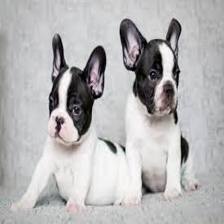

In [38]:
image = Image.open("test.jpg").convert("RGB").resize((224,224))
image

In [39]:

# model, size()  [ [[[r,g,b],[r,g,b]],..... 224
#                [[r,g,b],[r,g,b]],..... 224
#                [[r,g,b],[r,g,b]]]..... 224 ]

imgArry=np.array(image)


imgArry=(imgArry.astype(np.float32) / 127.5) - 1
imgArry.min(), imgArry.max()



(-1.0, 1.0)

In [40]:
imgre=imgArry.reshape(1,224,224,3)
print(imgArry.shape, imgre.shape)

model = load_model("keras_model.h5", compile=False)
pr=model.predict(imgre)
pr,np.argmax(pr)

(224, 224, 3) (1, 224, 224, 3)
1/1 [==============================] - 1s 729ms/step


(array([[0.8504765 , 0.14952347]], dtype=float32), 0)

In [41]:
className=['dog','cat']
bun=np.argmax(pr)
className[bun]

'dog'